In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
import numpy as np
import matplotlib.pyplot as plt

# 4.1 LCU 

In [19]:
def Ccirc():
    C = QuantumCircuit(1, name='C')
    return C.to_instruction()

def Cdcirc():
    Cd = QuantumCircuit(1, name='C†')
    return Cd.to_instruction()

def Bcirc():
    b = QuantumCircuit(2, name='B')
    return b.to_instruction()


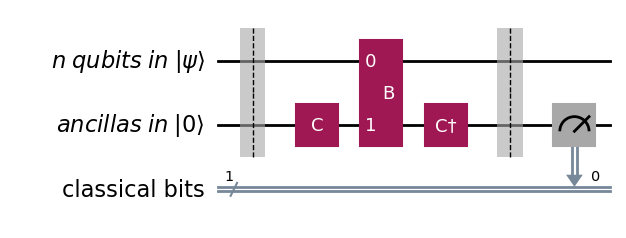

In [30]:
qubits, ancillas = QuantumRegister(1, 'n qubits in |ψ⟩'), QuantumRegister(1, 'ancillas in |0⟩')
cbits = ClassicalRegister(1, 'classical bits')

qc = QuantumCircuit(qubits, ancillas, cbits)
qc.barrier()

#apply C
C_instr = Ccirc()
qc.append(C_instr, [1])

# apply B
B_instr = Bcirc()
qc.append(B_instr, [0, 1])

#apply C^dagger
Cd_instr = Cdcirc()
qc.append(Cd_instr, [1])

qc.barrier()

# measure
qc.measure(ancillas, cbits)

lcu = qc.draw('mpl')
lcu

In [31]:
lcu.savefig('lcu.pdf')

# 4.3 Qubitization

## For the plot

In [19]:
def Acirc():
    C = QuantumCircuit(1, name='A')
    return C.to_instruction()

def Adcirc():
    Cd = QuantumCircuit(1, name='A†')
    return Cd.to_instruction()


In [97]:
from qiskit.circuit import Gate, QuantumCircuit

# Define a custom two-qubit gate
class CTwoQubits(Gate):
    def __init__(self, params):
        super().__init__('W', 2, [params])  # Name, num_qubits, params
    
    def _define(self):
        # Define the gate behavior using a QuantumCircuit
        qc = QuantumCircuit(2)
        print(self.params[0])
        self.definition = qc

# Define a custom two-qubit gate
class ZCirc(Gate):
    def __init__(self, params):
        super().__init__('Z', 2, [params])  # Name, num_qubits, params
    
    def _define(self):
        # Define the gate behavior using a QuantumCircuit
        qc = QuantumCircuit(2)
        #print(self.params[0])
        self.definition = qc


In [95]:
qubits, ancillas, ancilla = QuantumRegister(1, 'n qubits in |ψ⟩'), QuantumRegister(1, 'p ancillas in |0⟩'), QuantumRegister(1, 'ancilla in |0⟩')
cbits = ClassicalRegister(2, 'classical bits')
qc = QuantumCircuit(qubits, ancillas, ancilla, cbits)
qc.barrier()


#apply A
theta = np.pi/2
A_instr = Acirc()
qc.append(A_instr, [1])
qc.rx(-2*theta, -1)

#apply Z
#qc.x(-1)
Z1_instr = ZCirc(0).control(num_ctrl_qubits=1)
qc.append(Z1_instr, [2, 1, 0])  # Control: qubit 0, Targets: qubits 1 and 2
#qc.x(-1)

qc.append(Z1_instr, [2, 1, 0])  # Control: qubit 0, Targets: qubits 1 and 2

#apply W
W_instr = CTwoQubits(0).control(num_ctrl_qubits=1)
qc.append(W_instr, [2, 1, 0])  # Control: qubit 0, Targets: qubits 1 and 2

qc.append(Z1_instr, [2, 1, 0])  # Control: qubit 0, Targets: qubits 1 and 2

#apply A^dagger
Ad_instr = Adcirc()
qc.append(Ad_instr, [1])
qc.h(-1)

qc.barrier()
qc.measure(qc.qubits[1:], cbits)

qubitization = qc.draw('mpl')

0
0


In [96]:
qubitization.savefig('circuit_quibitization.pdf')

## Example 4.2

In [2]:
from qiskit import *
from qiskit.circuit import Gate, QuantumCircuit
# Define a custom two-qubit gate
class Wcirc(Gate):
    """
    Define W
    """
    def __init__(self, params):
        super().__init__('W', 2, [params])  # Name, num_qubits, params
    
    def _define(self):
        # Define the gate behavior using a QuantumCircuit
        qubits, ancillas =  QuantumRegister(1, 'physical'), QuantumRegister(1, 'p ancillas')
        qc = QuantumCircuit(qubits, ancillas)
        qc.cz(1,0)
        qc.x(1)
        qc.cx(1,0)
        #qc.x(1)
        #qc.x(1)
        self.definition = qc
    def display(self):
        display(self.definition.draw('mpl'))
    def matrix(self):
        return Operator(self.definition).data

class Zcirc(Gate):
    """
    Define W
    """
    def __init__(self, phi):
        super().__init__('Z', 1, [phi])  # Name, num_qubits, params
    
    def _define(self):
        # Define the gate behavior using a QuantumCircuit
        ancillas =  QuantumRegister(1, 'p ancillas')
        qc = QuantumCircuit(ancillas)
        qc.rx(-2.0*self.params[0], ancillas)
        self.definition = qc
    def display(self):
        display(self.definition.draw('mpl'))
    def matrix(self):
        return Operator(self.definition).data

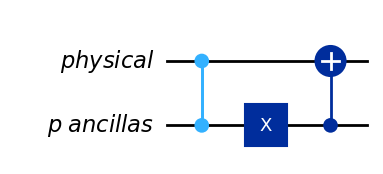

In [3]:
w1 = Wcirc(0)
w1.display()

In [5]:
wana = np.kron(np.kron([[0],[1]],[1,0]), [[0,1],[1,0]]) + np.kron(np.kron([[1],[0]],[0,1]), [[1,0],[0,-1]])

In [6]:
w1.matrix() - wana

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

checked!

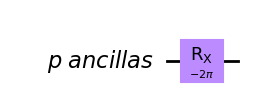

In [7]:
Z1 = Zcirc(np.pi)
Z1.display()

In [6]:
from scipy.special import j0, j1

In [7]:
t = np.sqrt(2)

norm = np.sqrt(j0(t)*j0(t) + 4.0*j1(t)*j1(t))

theta = np.arccos(j0(t)/norm)
chi1 = 0.0
if j1(t)!=0.0:
    print(np.sin(theta), -j1(t))
    chi1 = 0.5*np.pi*( np.sign(np.sin(theta)) + np.sign(j1(t)))
theta, chi1

0.8895815668785646 -0.5444627616584597


(1.0964282939088736, 3.141592653589793)

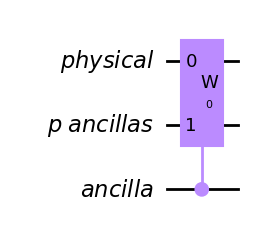

In [10]:
qubits, ancillas, ancilla = QuantumRegister(1, 'physical'), QuantumRegister(1, 'p ancillas'), QuantumRegister(1, 'ancilla')

Q1 = QuantumCircuit(qubits, ancillas, ancilla)

#Q1.rx(-2.0*theta, ancilla)
#Q1.h(ancillas)

# apply CW
CW = Wcirc(0).control(num_ctrl_qubits=1)
Q1.append(CW, [ancilla, qubits, ancillas])  # Control: qubit 0, Targets: qubits 1 and 2

Q1.draw('mpl')

In [11]:
np.abs(Operator(Q1) - (np.kron([[1, 0],[0,0]], np.identity(4)) + np.kron([[0, 0],[0,1]], wana)))<1e-15

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

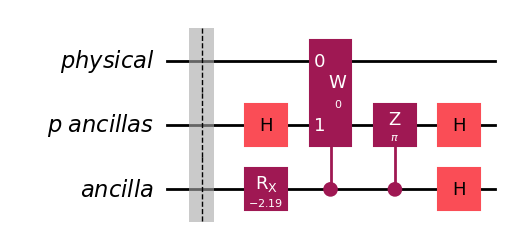

In [13]:
qubits, ancillas, ancilla = QuantumRegister(1, 'physical'), QuantumRegister(1, 'p ancillas'), QuantumRegister(1, 'ancilla')

Q1 = QuantumCircuit(qubits, ancillas, ancilla)

Q1.barrier()

Q1.rx(-2.0*theta, ancilla)
Q1.h(ancillas)

# apply CW
CW = Wcirc(0).control(num_ctrl_qubits=1)
Q1.append(CW, [ancilla, qubits, ancillas])  # Control: qubit 0, Targets: qubits 1 and 2

# apply Z
CZ = Zcirc(chi1).control(num_ctrl_qubits=1)
Q1.append(CZ, [ancilla, ancillas])  # Control: qubit 0, Target: qubit 1

# apply H \ometa A
Q1.h(ancilla)
Q1.h(ancillas)

Q1.draw('mpl')

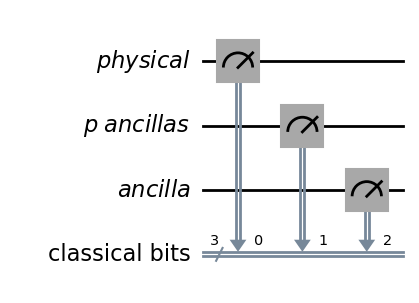

In [14]:
# measurements

qubits, ancillas, ancilla = QuantumRegister(1, 'physical'), QuantumRegister(1, 'p ancillas'), QuantumRegister(1, 'ancilla')
cbits = ClassicalRegister(3, 'classical bits')

mea = QuantumCircuit(qubits, ancillas, ancilla, cbits)
mea.measure(mea.qubits, cbits)

mea.draw('mpl')

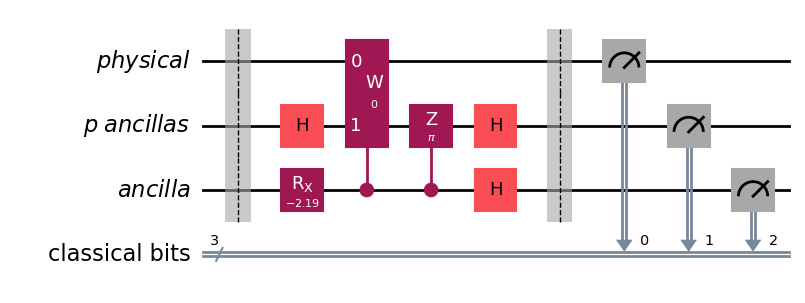

In [15]:
Q1.barrier()

Q1 &= mea

Q1plot = Q1.draw('mpl')
Q1plot

In [16]:
Q1plot.savefig('circuit_qubitizationr1.pdf')

## Results

In [214]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.providers.basic_provider import BasicSimulator

In [82]:
def run(t, sshots):
    #scale t
    t = np.sqrt(2.0)*t # to be consistent with Example 4.1
    norm = np.sqrt(j0(t)*j0(t) + 4.0*j1(t)*j1(t))

    theta = np.arccos(j0(t)/norm)
    chi1 = 0.0
    if j1(t)!=0.0:
        chi1 = 0.5*np.pi*( np.sign(np.sin(theta)) + np.sign(j1(t)))

    # Circuit
    qubits, ancillas, ancilla = QuantumRegister(1, 'physical'), QuantumRegister(1, 'p ancillas'), QuantumRegister(1, 'ancilla')
    Q1 = QuantumCircuit(qubits, ancillas, ancilla)
    # 1. the initial state |000>
    Q1.barrier()

    # qubitization circuit
    Q1.rx(-2.0*theta, ancilla)
    Q1.h(ancillas)

    # apply CW
    CW = Wcirc(0).control(num_ctrl_qubits=1)
    Q1.append(CW, [ancilla, qubits, ancillas])  # Control: qubit 0, Targets: qubits 1 and 2

    # apply Z
    CZ = Zcirc(chi1).control(num_ctrl_qubits=1)
    Q1.append(CZ, [ancilla, ancillas])  # Control: qubit 0, Target: qubit 1

    # apply H \ometa A
    Q1.h(ancilla)
    Q1.h(ancillas)

    # measurement
    cbits = ClassicalRegister(3, 'classical bits')

    mea = QuantumCircuit(qubits, ancillas, ancilla, cbits)
    mea.measure(mea.qubits, cbits)

    Q1.barrier()
    Q1 &= mea
    #print('t = {t}')
    #display(psi.draw('mpl'))

    # run
    backend = Aer.get_backend('qasm_simulator')
    job_simulator = execute(Q1, backend, shots=sshots)
    result_simulator = job_simulator.result()

    # result analyze
    counts = result_simulator.get_counts()
    final = np.array([[int(k), counts[k]] for k in counts.keys() if k[:2]=='00'])

    res = final[:, 1]/final[:, 1].sum()
    p1 = 0.0
    for k in range(len(res)):
        if final[k, 0]==1:
            p1 = res[k]    
    return p1

In [17]:
# sshots = 5120
# backend = BasicSimulator()
# job_simulator = backend.run(Q1, shots=sshots)
# result_simulator = job_simulator.result()
# result_simulator.get_counts() 
# there is some error in qiskit 1.3

In [89]:
ss = 51200
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(Q1, backend, shots=ss)
result_simulator = job_simulator.result()

In [46]:
counts = result_simulator.get_counts()
print(counts)

{'001': 518, '010': 494, '000': 1095, '111': 486, '011': 452, '110': 501, '100': 1082, '101': 492}


In [47]:
final = np.array([[int(k), counts[k]] for k in counts.keys() if k[:2]=='00'])
final

array([[   1,  518],
       [   0, 1095]])

In [48]:
final[:, 1]/final[:, 1].sum()

array([0.32114073, 0.67885927])

In [36]:
t/np.sqrt(2)

0.35355339059327373

In [92]:
final = np.array([[t, run(t, ss)] for t in np.linspace(0, 2.0, 100)])

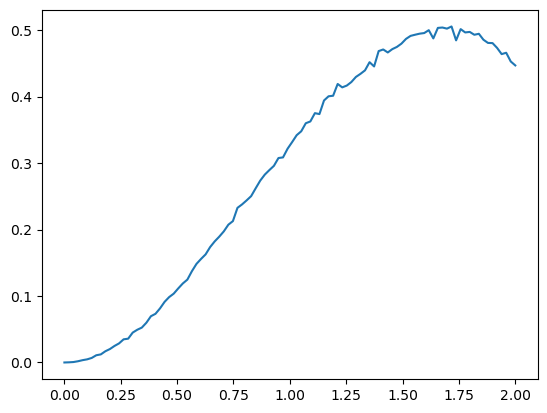

In [93]:
plt.plot(final[:,0], final[:,1])